In [36]:
import pandas as pd

In [13]:
df = pd.read_csv("file.csv")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IQ          100 non-null    int64  
 1   CGPA        100 non-null    float64
 2   HobbyScore  100 non-null    int64  
 3   Placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.3 KB
None


# 1 .Preprocessing [hobbyScore is irrevalent here]

In [14]:
df.drop(columns="HobbyScore",inplace=True)
print(df)

     IQ  CGPA  Placement
0   112   7.8          1
1    95   6.9          0
2   134   8.6          1
3   101   7.2          0
4   123   8.1          1
..  ...   ...        ...
95  110   7.6          1
96  100   7.1          0
97  130   8.5          1
98   60   3.4          1
99   56   7.1          1

[100 rows x 3 columns]


# Eda 

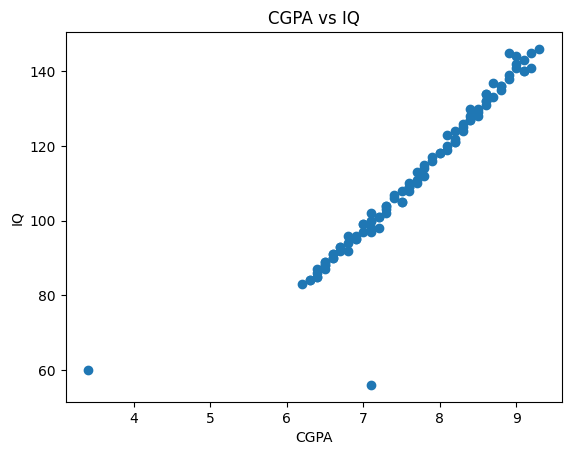

In [20]:
import matplotlib.pyplot as plt
plt.scatter(df["CGPA"],df["IQ"])
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("CGPA vs IQ")
plt.show()


In [28]:
x = df.iloc[:,0:2] #or can do  df[["IQ","CGPA"]]

y = df.iloc[:,-1]     # df["Placement"] heading ud jayegi iss se because series upper wala dataframe tha 


# splitting the dataset

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

     IQ  CGPA
33   91   6.6
90  108   7.5
24   93   6.7
50  111   7.7
71  134   8.6
9   130   8.4
93   85   6.4
29   98   7.2
49  135   8.8
18  107   7.4


# scale the dataset (range ki wajeh se )

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


[[-1.02292762 -1.07427666]
 [-0.1819393  -0.16406317]
 [-0.92398782 -0.97314183]
 [-0.0335296   0.03820649]
 [ 1.10427813  0.94841998]
 [ 0.90639852  0.74615032]
 [-1.31974703 -1.27654632]
 [-0.67663832 -0.46746767]
 [ 1.15374803  1.15068964]
 [-0.2314092  -0.265198  ]]


In [40]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [44]:
y_pred = clf.predict(X_test)


from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

[0 1 0 1 1 1 0 0 1 0]
33    0
90    1
24    0
50    1
71    1
9     1
93    0
29    0
49    1
18    0
Name: Placement, dtype: int64


1.0

In [50]:
import pickle 
pickle.dump(clf,open('model.pkl','wb'))